### KAMP 제조데이터 분석 경진 대회

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as pc
from pycaret.classification import *


In [2]:
# Load the data
data = pd.read_csv('./DATA/data.csv', encoding='cp949')
data.head(2)

,Unnamed: 0,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,0,??????? 3???? 2???,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,????,ON,731.0,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,1,??????? 3???? 2???,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,????,ON,720.0,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92015 entries, 0 to 92014
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    92015 non-null  int64  
 1   line                          92015 non-null  object 
 2   name                          92015 non-null  object 
 3   mold_name                     92015 non-null  object 
 4   time                          92015 non-null  object 
 5   date                          92015 non-null  object 
 6   count                         92015 non-null  int64  
 7   working                       92014 non-null  object 
 8   emergency_stop                92014 non-null  object 
 9   molten_temp                   89754 non-null  float64
 10  facility_operation_cycleTime  92015 non-null  int64  
 11  production_cycletime          92015 non-null  int64  
 12  low_section_speed             92014 non-null  float64
 13  h

In [33]:
data.describe()

,Unnamed: 0,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
count,92015.000000,92015.000000,89754.000000,92015.000000,92015.000000,92014.000000,92014.000000,46885.000000,92014.000000,92014.000000,...,91702.000000,92014.000000,92014.000000,91702.000000,92014.000000,92014.000000,92014.000000,92015.000000,92014.000000,92015.000000
mean,46007.000000,148.510895,718.618513,121.555007,122.514525,110.794999,112.624959,154.976624,324.554535,50.666486,...,1320.032278,203.766155,200.021725,1441.953033,418.613255,701.262493,32.332938,18.417595,0.043646,8674.612313
std,26562.586847,87.969953,51.728659,12.116145,13.595314,305.181962,10.759272,485.640901,27.327683,17.925620,...,392.371589,53.437545,45.216804,219.178967,115.831898,373.634822,14.265024,8.356021,0.204306,205.609122
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,0.000000,...,42.000000,18.000000,20.000000,299.000000,23.000000,0.000000,16.000000,0.000000,0.000000,8412.000000
25%,23003.500000,72.000000,713.000000,117.000000,119.000000,110.000000,112.000000,49.000000,329.000000,47.000000,...,1449.000000,165.000000,172.000000,1449.000000,383.000000,697.000000,31.000000,23.000000,0.000000,8413.000000
50%,46007.000000,146.000000,728.000000,119.000000,121.000000,110.000000,112.000000,67.000000,330.000000,50.000000,...,1449.000000,208.000000,198.000000,1449.000000,461.000000,703.000000,32.000000,23.000000,0.000000,8722.000000
75%,69010.500000,222.000000,730.000000,122.000000,123.000000,110.000000,112.000000,85.000000,331.000000,53.000000,...,1449.000000,250.000000,229.000000,1449.000000,484.000000,710.000000,34.000000,23.000000,0.000000,8917.000000
max,92014.000000,334.000000,735.000000,457.000000,485.000000,65535.000000,388.000000,2767.000000,348.000000,422.000000,...,1449.000000,369.000000,1449.000000,65503.000000,1449.000000,65535.000000,1449.000000,25.000000,1.000000,8917.000000


In [34]:
# Change the data type of the columns
# - object -> OneHotEncoding
# - date -> datetime : [date, time]

# time + date
data['datetime'] = data['time'] + ' ' + data['date']
data['datetime'] = pd.to_datetime(data['datetime'])
data['datetime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92015 entries, 0 to 92014
Series name: datetime
Non-Null Count  Dtype         
--------------  -----         
92015 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 719.0 KB


In [35]:
# Numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols
data[num_cols]

,Unnamed: 0,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


## Pycaret 사용

In [40]:
# pycaret regression
data = data.dropna(subset=['passorfail'])
num_cols.remove('passorfail')

clsf = setup(
    data = data,
    target = 'passorfail',
    categorical_features= ['name', 'working', 'emergency_stop'],
    date_features= ['datetime'],
    numeric_features= num_cols,
    ignore_features= ['time', 'date']
)

,Description,Value
0,Session id,809
1,Target,passorfail
2,Target type,Binary
3,Original data shape,"(92014, 33)"
4,Transformed data shape,"(92014, 33)"
5,Transformed train set shape,"(64409, 33)"
6,Transformed test set shape,"(27605, 33)"
7,Ignore features,2
8,Numeric features,21
9,Date features,1


In [41]:
compare_models(verbose=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9961,0.9982,0.9406,0.9690,0.9545,0.9525,0.9526,0.3010
dummy,Dummy Classifier,0.9564,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1300


c:\Users\HOME\anaconda3\envs\DC_ML\lib\site-packages\pycaret\internal\pycaret_experiment\supervised_experiment.py:323: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  master_display_.apply(


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=809, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [42]:
# Create a model
model = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9960,0.9997,0.9395,0.9670,0.9531,0.9510,0.9511
1,0.9974,0.9989,0.9537,0.9853,0.9693,0.9679,0.9680
2,0.9960,0.9992,0.9395,0.9670,0.9531,0.9510,0.9511
3,0.9952,0.9990,0.9395,0.9496,0.9445,0.9420,0.9420
4,0.9957,0.9996,0.9324,0.9668,0.9493,0.9470,0.9472
5,0.9957,0.9968,0.9359,0.9634,0.9495,0.9472,0.9473
6,0.9961,0.9987,0.9253,0.9848,0.9541,0.9521,0.9526
7,0.9967,0.9997,0.9537,0.9710,0.9623,0.9606,0.9606
8,0.9960,0.9908,0.9468,0.9604,0.9536,0.9515,0.9515


In [43]:
# Tune the model
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9960,0.9997,0.9359,0.9705,0.9529,0.9508,0.9510
1,0.9972,0.9974,0.9537,0.9817,0.9675,0.9660,0.9662
2,0.9958,0.9985,0.9395,0.9635,0.9514,0.9492,0.9492
3,0.9955,0.9988,0.9359,0.9599,0.9477,0.9454,0.9455
4,0.9952,0.9992,0.9288,0.9596,0.9439,0.9414,0.9416
5,0.9960,0.9958,0.9253,0.9811,0.9524,0.9503,0.9507
6,0.9967,0.9994,0.9395,0.9851,0.9617,0.9600,0.9603
7,0.9960,0.9994,0.9395,0.9670,0.9531,0.9510,0.9511
8,0.9932,0.9925,0.8936,0.9474,0.9197,0.9161,0.9166


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


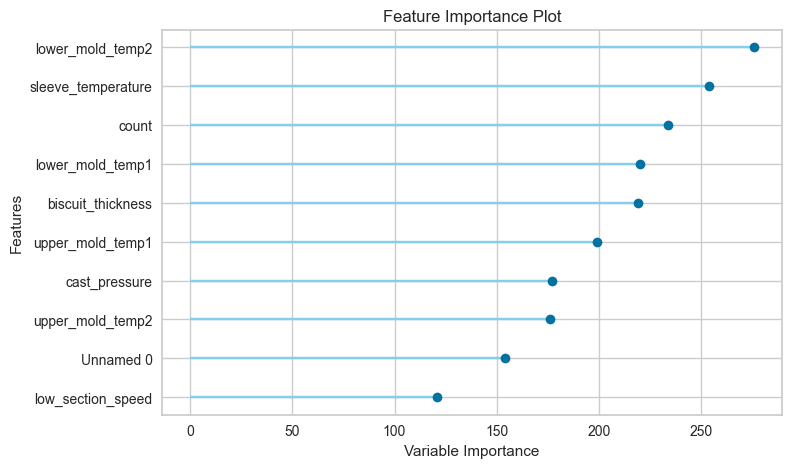

In [44]:
# Plot the model
plot_model(tuned_model, plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

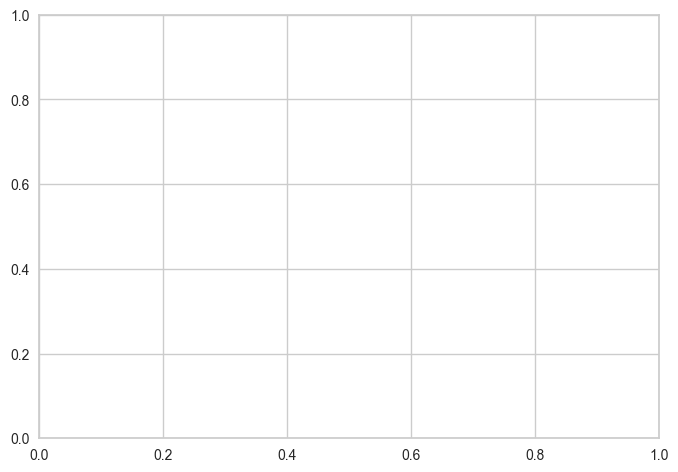

In [45]:
# Evaluate the model
evaluate_model(tuned_model)

In [46]:
# Predict the model
predict_model(tuned_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9971,0.9985,0.9560,0.9779,0.9668,0.9654,0.9654


,Unnamed: 0,line,name,mold_name,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,production_cycletime,...,Coolant_temperature,EMS_operation_time,registration_time,tryshot_signal,mold_code,heating_furnace,datetime,passorfail,prediction_label,prediction_score
60064,60064,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,43,가동,ON,730.0,116,117,...,34.0,6,2019-02-28 21:25:15,NaN,8412,B,2019-02-28 21:25:15,0.0,0,1.0000
25742,25742,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,207,가동,ON,713.0,121,122,...,37.0,23,2019-01-29 15:38:59,NaN,8722,NaN,2019-01-29 15:38:59,0.0,0,0.9997
51233,51233,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,62,가동,ON,729.0,121,127,...,31.0,23,2019-02-23 10:19:05,NaN,8722,NaN,2019-02-23 10:19:05,0.0,0,0.9992
8835,8835,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,7,가동,ON,716.0,125,123,...,25.0,23,2019-01-16 08:09:10,NaN,8573,B,2019-01-16 08:09:10,0.0,0,0.9998
31606,31606,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,7,가동,ON,709.0,116,116,...,29.0,23,2019-02-02 20:10:02,NaN,8917,A,2019-02-02 20:10:02,0.0,0,0.9981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65645,65645,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,300,가동,ON,725.0,119,121,...,30.0,23,2019-03-07 06:33:19,NaN,8917,NaN,2019-03-07 06:33:19,0.0,0,0.9987
47954,47954,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,235,가동,ON,727.0,115,118,...,31.0,23,2019-02-21 16:05:01,NaN,8917,NaN,2019-02-21 16:05:01,0.0,0,0.9998
51240,51240,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,64,가동,ON,728.0,120,122,...,31.0,23,2019-02-23 10:23:11,NaN,8722,NaN,2019-02-23 10:23:11,0.0,0,0.9998
2801,2801,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,162,가동,ON,730.0,119,120,...,31.0,23,2019-01-07 13:37:32,NaN,8573,B,2019-01-07 13:37:32,0.0,0,0.9997


In [48]:
# Finalize the model
final_model = finalize_model(tuned_model)

# Save the model
time = pd.Timestamp.now().strftime('%m%d%H%M')
save_model(final_model, 'pycaret_model_'+time)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['datetime'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'count',
                                              'molten_temp',
                                              'facility_operation_cycleTime',
                                              'production_cycletime',
                                              'low_...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_typ